In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing as pp

# parse features and labels for train and test data
def parse_data(fpath):
    return pd.read_csv(fpath, header=None)

train_feat_path = 'data/features_train/features_resnet1000_train.csv'
test_feat_path = 'data/features_test/features_resnet1000_test.csv'

train_features = parse_data(train_feat_path)
test_features = parse_data(test_feat_path)

In [22]:
import glob
import re
import os
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords

large_word_dict = {}
# create dictionary based on train set
def create_word_dict(path):
    stemmer = PorterStemmer()
    
    for filename in glob.glob(os.path.join(path, "*.txt")):
        with open(filename, "r") as content_file:
            content = content_file.read()
            # lowercase words
            content = np.char.lower(content)

            # strip Punctuation
            content = re.sub('[^\w\s]', ' ', str(content))

            # lemmatize and remove stop Words
            for word in content.split():
                if word not in stopwords.words("english"):
                    w = stemmer.stem(word)
                    if w in large_word_dict:
                        large_word_dict[w] += 1
                    else:
                        large_word_dict[w] = 1
                        
create_word_dict("data/descriptions_train/")

print(large_word_dict)

{'skateboard': 1072, 'put': 99, 'show': 297, 'use': 348, 'picnic': 69, 'tabl': 2606, 'stage': 20, 'pull': 284, 'trick': 335, 'top': 2238, 'man': 5989, 'ride': 1745, 'skate': 280, 'boarder': 48, 'person': 2085, 'crowd': 344, 'watch': 474, 'bowl': 508, 'soup': 61, 'carrot': 215, 'shrimp': 9, 'noodl': 29, 'healthi': 10, 'food': 1125, 'readi': 326, 'eat': 866, 'sit': 5533, 'next': 3133, 'chopstick': 10, 'tasti': 25, 'ramen': 3, 'serv': 188, 'someon': 245, 'enjoy': 90, 'asian': 68, 'bunch': 513, 'luggag': 277, 'lay': 870, 'area': 810, 'rug': 62, 'sever': 848, 'piec': 409, 'floor': 492, 'persian': 2, 'travel': 365, 'bag': 264, 'carpet': 49, 'brown': 727, 'crack': 7, 'crust': 35, 'bake': 55, 'berri': 19, 'pie': 64, 'strawberri': 18, 'file': 17, 'look': 1443, 'crusti': 2, 'good': 31, 'close': 665, 'cook': 179, 'fruit': 334, 'flavor': 10, 'muffin': 33, 'imag': 360, 'sort': 46, 'flaki': 1, 'pasteri': 1, 'display': 494, 'sign': 1413, 'clear': 130, 'view': 502, 'traffic': 396, 'light': 717, 'juic'

In [91]:
# build bag of words for test and train descriptions
word_dict = {}
def build_bag_of_words(path, thresh):
    index = 0
    stemmer = PorterStemmer()

    index = 0
    for w in large_word_dict:
        if large_word_dict[w] > thresh:
            word_dict[w] = index
            index += 1  
    
    des_vec = {}
    for filename in glob.glob(os.path.join(path, "*.txt")):
        with open(filename, "r") as content_file:
            content = content_file.read()
            # lowercase words
            content = np.char.lower(content)

            # remove punctuation
            content = re.sub('[^\w\s]', ' ', str(content))

            # Lemmatize and remove stop words
            cur = [0] * len(word_dict)
            for word in content.split():
                try:
                    if word not in stopwords.words("english"):
                        w = stemmer.stem(word)
                        if w in word_dict:
                            cur[word_dict[w]] += 1
                except:
                    pass
            des_vec[filename.split('/')[-1]] = cur
    return des_vec

train_des = build_bag_of_words("data/descriptions_train/", 10)
test_des = build_bag_of_words("data/descriptions_test/", 10)


In [99]:
from sklearn import preprocessing as pp

def post_process_descriptions(desc_feat):
    for k, v in desc_feat.items():
        post = pp.normalize(np.array(v).reshape(1, -1), norm='l2')
        desc_feat[k] = post.flatten()

post_process_descriptions(train_des)
post_process_descriptions(test_des)

In [100]:
print((train_des.values()))

dict_values([array([ 0.4472136,  0.1118034,  0.1118034, ...,  0.       ,  0.       ,  0.       ]), array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), array([ 0.,  0.,  0.,

In [101]:
from sklearn.neighbors import KNeighborsClassifier


knn = KNeighborsClassifier(n_neighbors=1)
train_input, train_output = [], []

for idx in train_des:
    train_input.append(train_des[idx])
    train_output.append(idx)
    
train_input = np.array(train_input)
train_output = np.array(train_output)

knn.fit(train_input, train_output)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [102]:
# build dictionary of train labels to train features
tf_dict = {}
def map_train_labels_to_features():
    tf = train_features.as_matrix()
    for i  in range(len(tf)):
        name = int(tf[i][0].split("/")[1].split(".")[0])
        tf_dict[name] = np.array(tf[i][1:], dtype=float)

map_train_labels_to_features()

In [41]:
import scipy as sp

def get_dist(feat1, feat2):
    dist = sp.spatial.distance.cdist(feat1.reshape(1, -1), feat2.reshape(1, -1), 'euclidean').flatten()
    return dist[0]


def get_dist2(feat1, feat2):
    dist = sp.spatial.distance.cdist(feat1.reshape(1, -1), feat2.reshape(1, -1), 'cosine').flatten()
    return dist[0]

In [103]:
import operator

def get_top_20(des):
    # for each test description feature, predict the most similar train image based on KNN
    desc = np.array(test_des[des])
    normed_d = desc / desc.sum()
    pred = knn.predict(normed_d.reshape(1, -1))
    pred_int = int(pred[0].split(".")[0])
    
    # get train desc feature from train image
    tf_train = tf_dict[pred_int]

    feat_score = {}
    res = []

    # for each test feature, compute distance to train feature to select closest 20
    for tf_test in test_features.as_matrix():
        name = tf_test[0,].split("/")[1]
        #print(tf_test[1:], tf_train)
        score = get_dist2(tf_test[1:], tf_train)

        feat_score[name] = score
    sorted_feat_score = sorted(feat_score.items(), key=operator.itemgetter(1))
    for i in range(20):
        res.append(sorted_feat_score[i][0])
    return np.array(res)
    


0.txt ['222.jpg' '105.jpg' '1980.jpg' '1396.jpg' '829.jpg' '106.jpg' '1883.jpg'
 '309.jpg' '82.jpg' '279.jpg' '1623.jpg' '333.jpg' '1627.jpg' '305.jpg'
 '597.jpg' '1581.jpg' '1144.jpg' '46.jpg' '669.jpg' '1886.jpg']


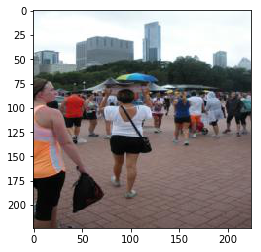

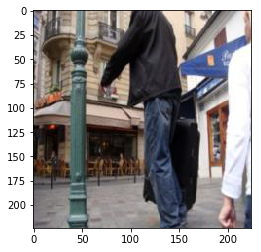

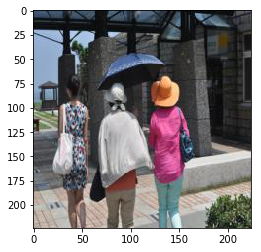

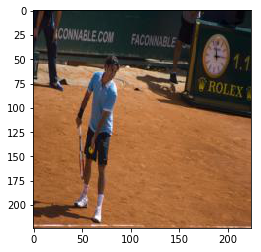

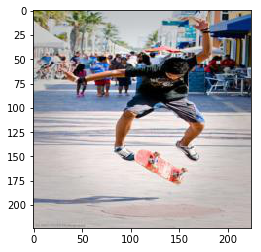

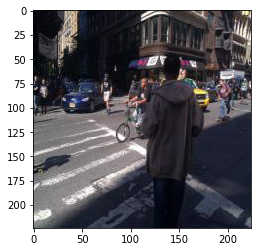

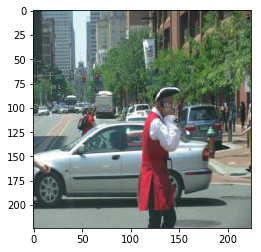

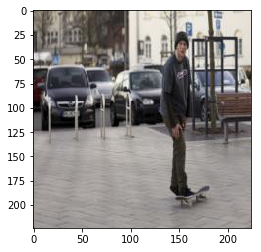

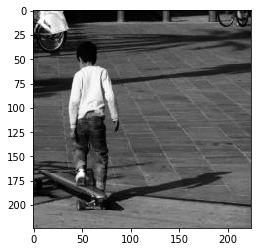

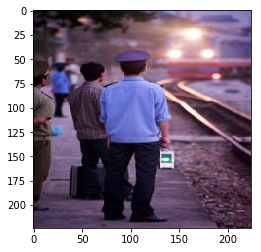

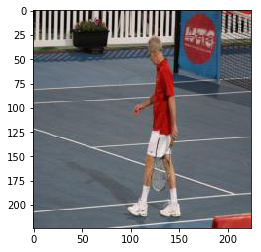

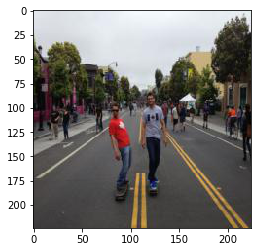

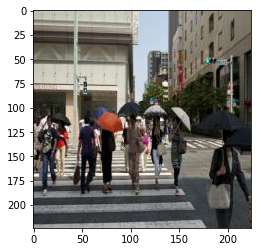

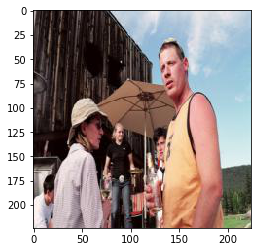

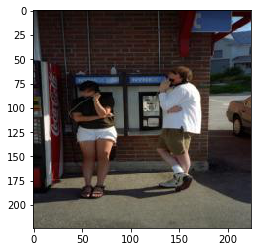

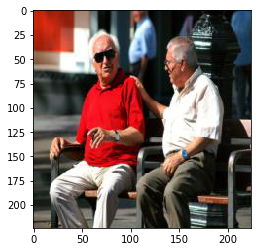

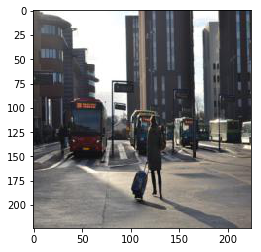

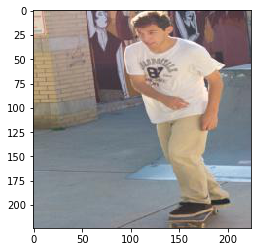

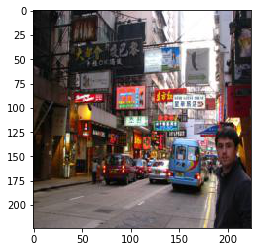

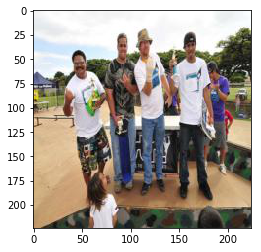

1.txt ['1714.jpg' '589.jpg' '14.jpg' '753.jpg' '885.jpg' '1806.jpg' '457.jpg'
 '1809.jpg' '1054.jpg' '1929.jpg' '200.jpg' '833.jpg' '331.jpg' '1199.jpg'
 '1733.jpg' '1550.jpg' '355.jpg' '1753.jpg' '1507.jpg' '1812.jpg']


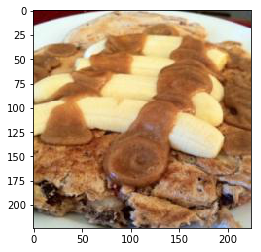

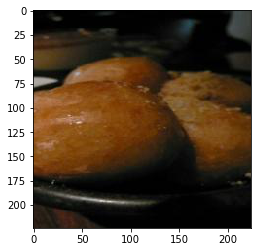

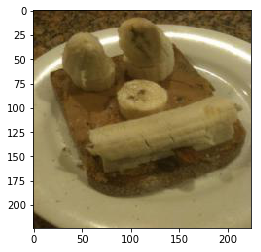

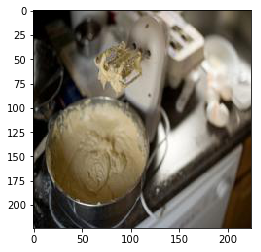

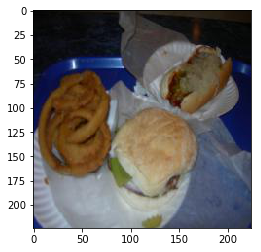

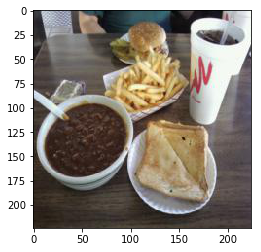

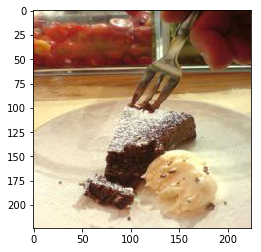

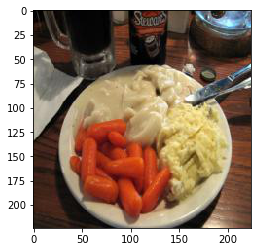

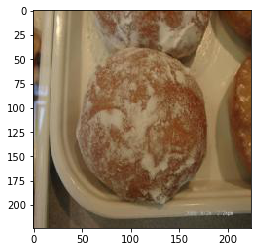

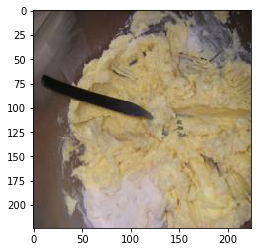

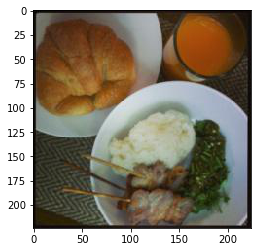

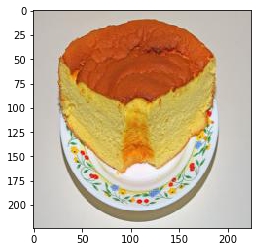

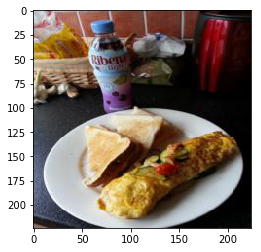

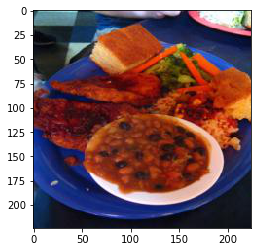

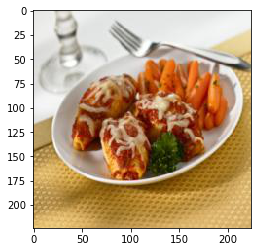

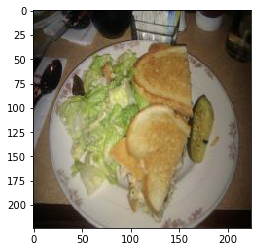

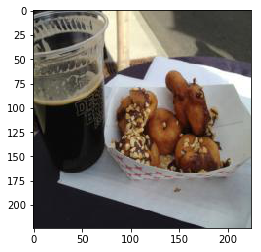

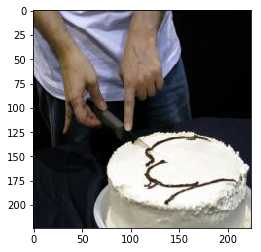

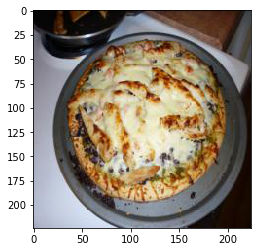

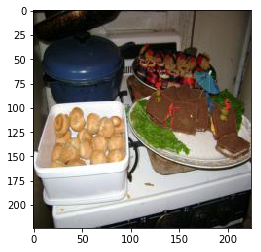

10.txt ['634.jpg' '1471.jpg' '42.jpg' '1084.jpg' '511.jpg' '322.jpg' '260.jpg'
 '1499.jpg' '649.jpg' '1033.jpg' '1208.jpg' '1144.jpg' '979.jpg' '953.jpg'
 '1421.jpg' '1482.jpg' '838.jpg' '159.jpg' '184.jpg' '696.jpg']


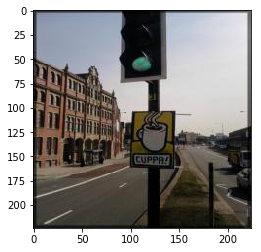

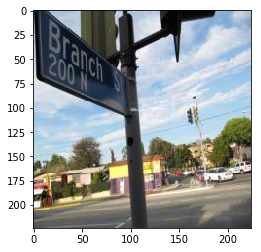

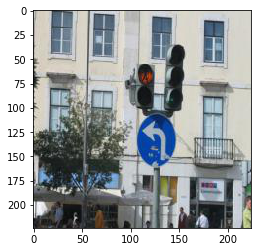

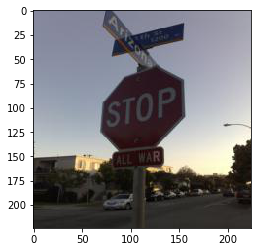

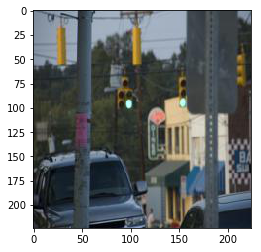

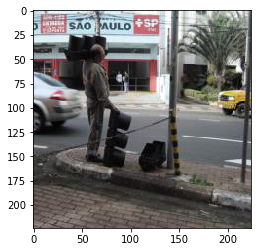

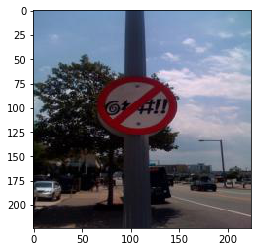

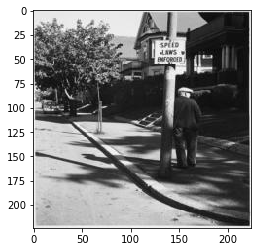

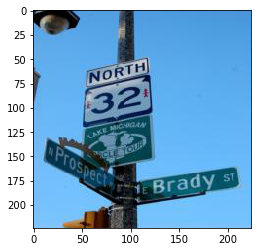

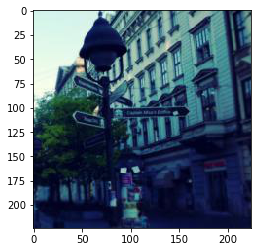

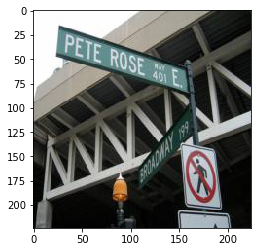

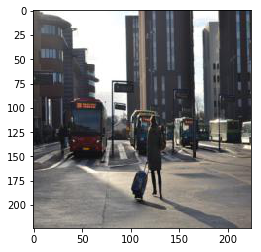

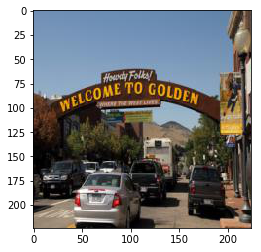

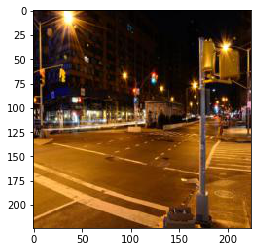

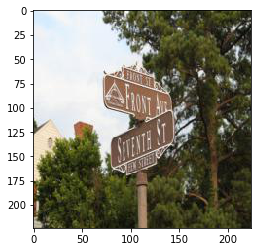

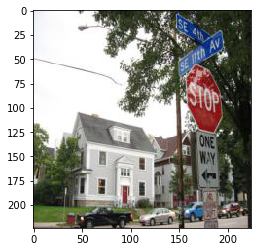

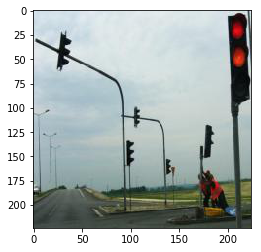

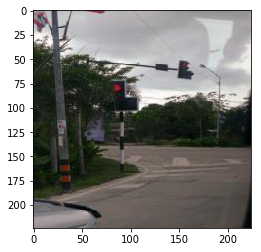

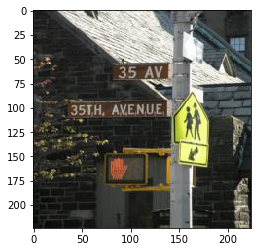

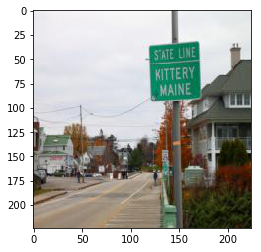

KeyboardInterrupt: 

In [104]:
from PIL import Image
import matplotlib.pyplot as plt


def display_sample_pred():
    count = 0
    for t_desc in test_des:
        count += 1
        top = get_top_20(t_desc)
        print(t_desc, get_top_20(t_desc))
        for image in top:
            img = Image.open('data/images_test/' + image)
            img = np.asarray(img)
            plt.imshow(img)
            plt.show()
        if count > 5:
            break

display_sample_pred()

In [106]:
import csv

def write_submissions(output_filename):
    output_file = open(output_filename, "w")
    writer = csv.writer(output_file)
    #write headers
    writer.writerow(["Descritpion_ID", "Top_20_Image_IDs"])
    # get top 20 images for each test description
    for desc in test_des:
        images = " ".join(get_top_20(desc))
        writer.writerow([desc, images])

write_submissions('sample_submission.csv')

In [ ]:
########### Image to Description

In [ ]:
def image_to_desc_feat():
    # map of test label to aggregated description features
    test_label_agg_desc = {}
    dist_matrix = sp.spatial.distance.cdist(test_features, train_features, 'cosine')
    
    for i in range(dist_matrix.shape[0]):
        # find row indices of the lowest values, the indices for closest images in train features
        # append to list train_image_idx
        train_feat_idx = dist_matrix[i].argsort()[:2]
        train_image_idx = []
        # for each train feature index, find corresponding train image file 
        for j in train_feat_idx:
            train_image = int(train_labels[j].split('/')[1].split('.')[0])
            train_image_idx.append(train_image)
        print(test_labels[i], train_image_idx)
        test_label_agg_desc[test_labels[i]] = get_agg_desc_feat(train_image_idx)
    return test_label_agg_desc
            

# create aggregated description matrix by adding closest train description feature vectors
def get_agg_desc_feat(train_image_idx):
    agg_desc_feat = [0] * (train_desc_feat.shape[1])
    for image_idx in train_image_idx:
        agg_desc_feat += train_desc_feat[image_idx]
    return agg_desc_feat    
        
    
test_label_agg_desc = image_to_desc_feat() 
print(test_label_agg_desc)

In [ ]:
def get_top_20_images_desc(desc_feat):
    feat_scores = {}
    top_images = []

    for label, agg_desc_feat in test_label_agg_desc.items():
        score = get_dist(desc_feat, agg_desc_feat)
        # test image label to its l2 distance of desc feat to agg desc feat
        feat_scores[label] = score
    # get top 20 test images based score computed from L2 distance    
    sorted_feat_score = sorted(feat_scores.items(), key=operator.itemgetter(1))
    for k, v in sorted_feat_score[:20]:
        top_images.append(k.split('/')[1])
    return top_images
        
for i, desc_feat in enumerate(test_desc_feat[:10]):
    top = get_top_20_images_desc(desc_feat)
    print(test_desc[i], top)
    for image in top:
        img = Image.open('data/images_test/' + image)
        img = np.asarray(img)
        plt.imshow(img)
        plt.show()            